# 📊 Cryptocurrency Analysis (Solana + Others)

This repository contains **cryptocurrency data visualizations**, built in **Python**.  
Most of the analysis focuses on **Solana (SOL)**.  

The goal of this project is to demonstrate practical visualizations. 

---

# 📦 Required Packages

To run this notebook, you need to install the following libraries:  

```bash
# Using pip
pip install numpy pandas matplotlib seaborn yfinance requests

# Or using conda
conda install numpy pandas matplotlib seaborn yfinance requests

# ▶️ Running the Notebook

This project is designed to run in **Jupyter Notebook**.  
Each cell in the notebook can be executed independently.  

Keyboard shortcuts for running cells:  

- `Ctrl + Enter` → run the current cell  
- `Shift + Enter` → run the current cell and move to the next one  
- `Alt + Enter` → run the current cell and insert a new one below  

👉 The most common workflow is using **Shift + Enter** to move through the notebook step by step.  
Use `Ctrl + Enter` if you want to re-run the same cell multiple times without moving.

# 📝 Disclaimer

All visualizations and analyses in this repository are provided for **educational purposes only**.  
They do **not** constitute financial or investment advice.



In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from io import StringIO
import matplotlib.ticker as mticker
import requests

# Optional: set default style for seaborn plots
sns.set(style="darkgrid")

In [26]:
TICKERS = ["BTC-USD", "ETH-USD", "XRP-USD", 
           "BNB-USD", "SOL-USD", "DOGE-USD", 
           "ADA-USD", "DOT-USD"]

for t in TICKERS:
    df = yf.download(
        t,
        period="max",
        interval="1d",
        progress=False,
        auto_adjust=False
    )
    if not df.empty:
        # Memory size in RAM
        size_bytes = df.memory_usage(deep=True).sum()
        size_mb = size_bytes / (1024**2)

        # CSV size (simulate saving to disk)
        buffer = StringIO()
        df.to_csv(buffer, index=True)
        csv_size_bytes = buffer.tell()
        csv_size_mb = csv_size_bytes / (1024**2)

        print(f"{t}: {len(df)} rows")
        print(f"   ~{size_mb:.2f} MB in memory (RAM)")
        print(f"   ~{csv_size_mb:.2f} MB as CSV file on disk")
    else:
        print(f"{t}: no data")

BTC-USD: 4011 rows
   ~0.21 MB in memory (RAM)
   ~0.39 MB as CSV file on disk
ETH-USD: 2862 rows
   ~0.15 MB in memory (RAM)
   ~0.31 MB as CSV file on disk
XRP-USD: 2862 rows
   ~0.15 MB in memory (RAM)
   ~0.32 MB as CSV file on disk
BNB-USD: 2862 rows
   ~0.15 MB in memory (RAM)
   ~0.31 MB as CSV file on disk
SOL-USD: 1979 rows
   ~0.11 MB in memory (RAM)
   ~0.22 MB as CSV file on disk
DOGE-USD: 2862 rows
   ~0.15 MB in memory (RAM)
   ~0.34 MB as CSV file on disk
ADA-USD: 2862 rows
   ~0.15 MB in memory (RAM)
   ~0.33 MB as CSV file on disk
DOT-USD: 1847 rows
   ~0.10 MB in memory (RAM)
   ~0.20 MB as CSV file on disk


In [8]:
TICKERS = ["BTC-USD", "ETH-USD", "XRP-USD", 
           "BNB-USD", "SOL-USD", "DOGE-USD", 
           "ADA-USD", "DOT-USD"]

results = []

for t in TICKERS:
    df = yf.download(t, period="max", interval="1d", progress=False, auto_adjust=False)
    if not df.empty:
        results.append({
            "Symbol": t,
            "Start": df.index.min().strftime("%Y-%m-%d"),
            "End": df.index.max().strftime("%Y-%m-%d"),
            "Last_Close": df["Close"].iloc[-1]
        })

summary = pd.DataFrame(results)
print(summary.head())

    Symbol       Start         End  \
0  BTC-USD  2014-09-17  2025-09-09   
1  ETH-USD  2017-11-09  2025-09-09   
2  XRP-USD  2017-11-09  2025-09-09   
3  BNB-USD  2017-11-09  2025-09-09   
4  SOL-USD  2020-04-10  2025-09-09   

                                          Last_Close  
0  Ticker
BTC-USD    112921.851562
Name: 2025-09-...  
1  Ticker
ETH-USD    4357.62793
Name: 2025-09-09 ...  
2  Ticker
XRP-USD    3.009815
Name: 2025-09-09 00...  
3  Ticker
BNB-USD    881.304871
Name: 2025-09-09 ...  
4  Ticker
SOL-USD    218.978928
Name: 2025-09-09 ...  


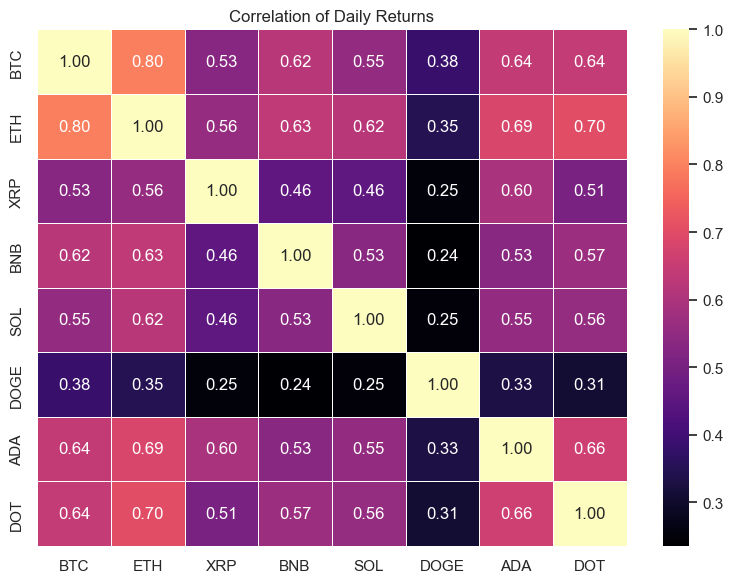

In [23]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TICKERS = ["BTC-USD", "ETH-USD", "XRP-USD", 
           "BNB-USD", "SOL-USD", "DOGE-USD", 
           "ADA-USD", "DOT-USD"]

data = {}

for t in TICKERS:
    df = yf.download(
        t,
        period="max",
        interval="1d",
        progress=False,
        auto_adjust=False
    )
    if not df.empty:
        series = df["Close"].copy()
        data[t] = series

# Merge aligned on Date
if data:
    prices = pd.concat(data.values(), axis=1)

    # Calculate daily percentage returns
    returns = prices.pct_change().dropna()

    # Compute correlation matrix of returns
    corr = returns.corr()
    corr.index = [name.replace("-USD", "") for name in corr.index]
    corr.columns = [name.replace("-USD", "") for name in corr.columns]

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="magma", linewidths=0.5, fmt=".2f")
    plt.title("Correlation of Daily Returns")
    plt.tight_layout()
    plt.show()
else:
    print("No data available for selected tickers.")


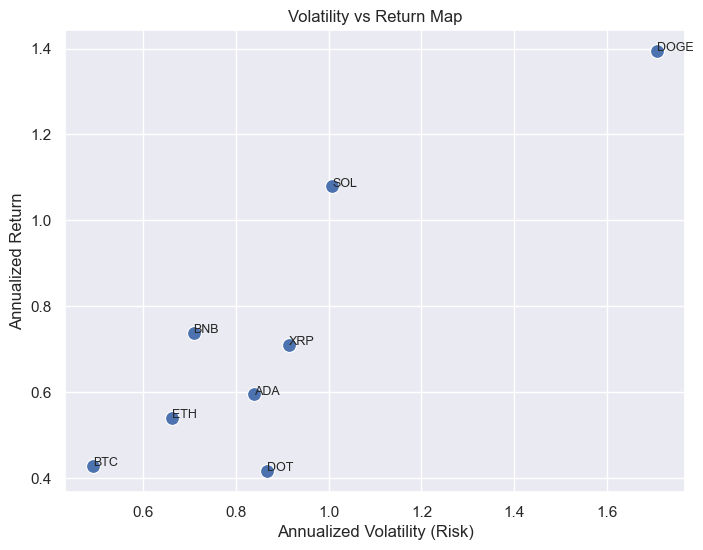

In [33]:
TICKERS = ["BTC-USD", "ETH-USD", "XRP-USD",
           "BNB-USD", "SOL-USD", "DOGE-USD",
           "ADA-USD", "DOT-USD"]

series_list = []

for t in TICKERS:
    df = yf.download(t, period="max", interval="1d", progress=False, auto_adjust=False)
    if not df.empty:
        s = df["Close"].copy()
        s.name = t   # upewniamy się, że kolumna ma dobrą nazwę
        series_list.append(s)

# Merge all series into one DataFrame
if series_list:
    prices = pd.concat(series_list, axis=1)

    # Daily returns
    returns = prices.pct_change().dropna()

    # Annualized return and volatility
    mean_returns = returns.mean() * 252
    volatility = returns.std() * np.sqrt(252)

    # Scatterplot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=volatility, y=mean_returns, s=100)

    for i in mean_returns.index:
        plt.text(volatility[i], mean_returns[i], i.replace("-USD", ""), fontsize=9)

    plt.xlabel("Annualized Volatility (Risk)")
    plt.ylabel("Annualized Return")
    plt.title("Volatility vs Return Map")
    plt.grid(True)
    plt.show()`
else:
    print("No data downloaded.")

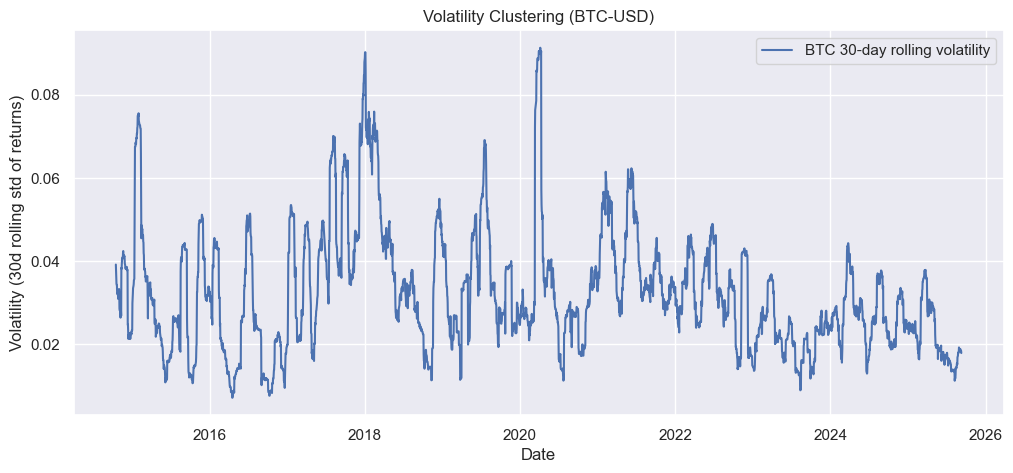

In [28]:
df = yf.download("BTC-USD", period="max", interval="1d", progress=False, auto_adjust=False)

# Daily returns
returns = df["Close"].pct_change().dropna()

# Rolling volatility (30 days)
window = 30
rolling_vol = returns.rolling(window).std()

plt.figure(figsize=(12, 5))
plt.plot(rolling_vol, label="BTC 30-day rolling volatility")
plt.title("Volatility Clustering (BTC-USD)")
plt.xlabel("Date")
plt.ylabel("Volatility (30d rolling std of returns)")
plt.legend()
plt.grid(True)
plt.show()

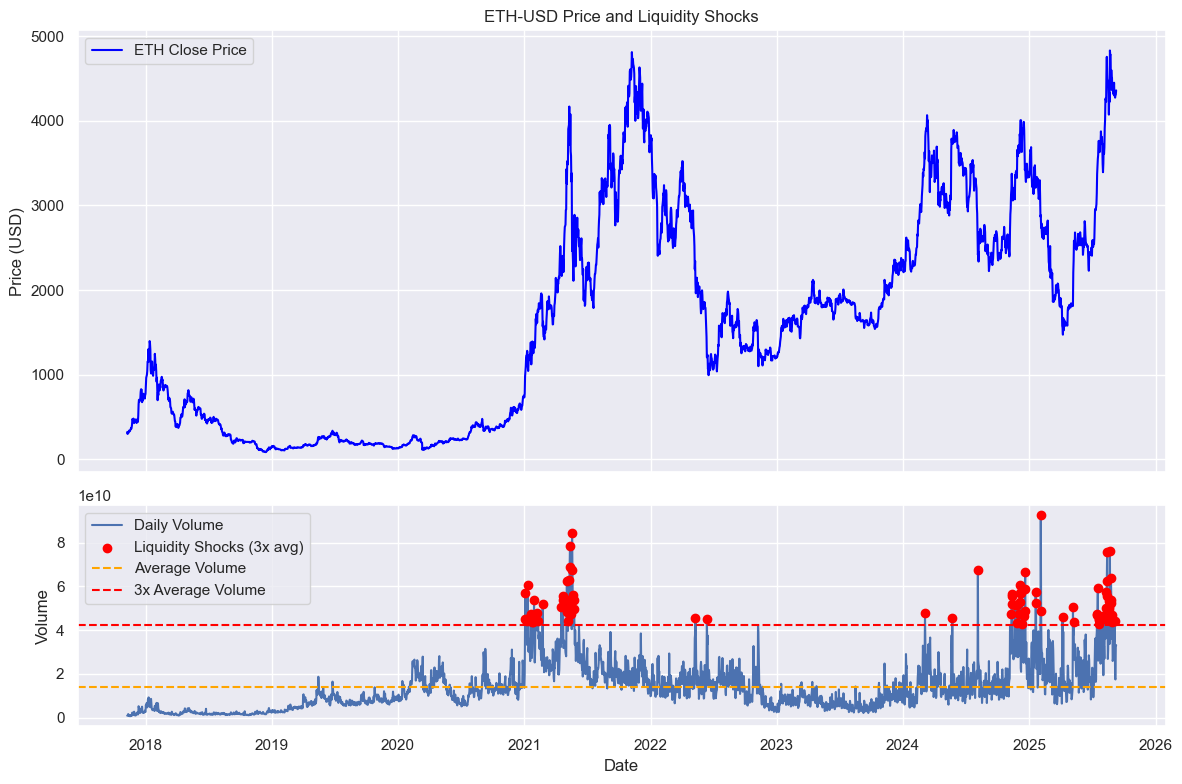

In [32]:

# Download ETH data
df = yf.download("ETH-USD", period="max", interval="1d", progress=False, auto_adjust=False)

# Volume data
vol = df["Volume"]
avg_vol = vol.mean().item()
threshold = 3 * avg_vol
shocks = vol[vol > threshold]

# Plot: price + volume with shocks
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={"height_ratios": [2, 1]})

# --- Price plot ---
ax1.plot(df.index, df["Close"], color="blue", label="ETH Close Price")
ax1.set_title("ETH-USD Price and Liquidity Shocks")
ax1.set_ylabel("Price (USD)")
ax1.grid(True)
ax1.legend()

# --- Volume plot ---
ax2.plot(vol.index, vol, label="Daily Volume")
ax2.scatter(shocks.index, shocks, color="red", label="Liquidity Shocks (3x avg)", zorder=5)
ax2.axhline(avg_vol, color="orange", linestyle="--", label="Average Volume")
ax2.axhline(threshold, color="red", linestyle="--", label="3x Average Volume")
ax2.set_xlabel("Date")
ax2.set_ylabel("Volume")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


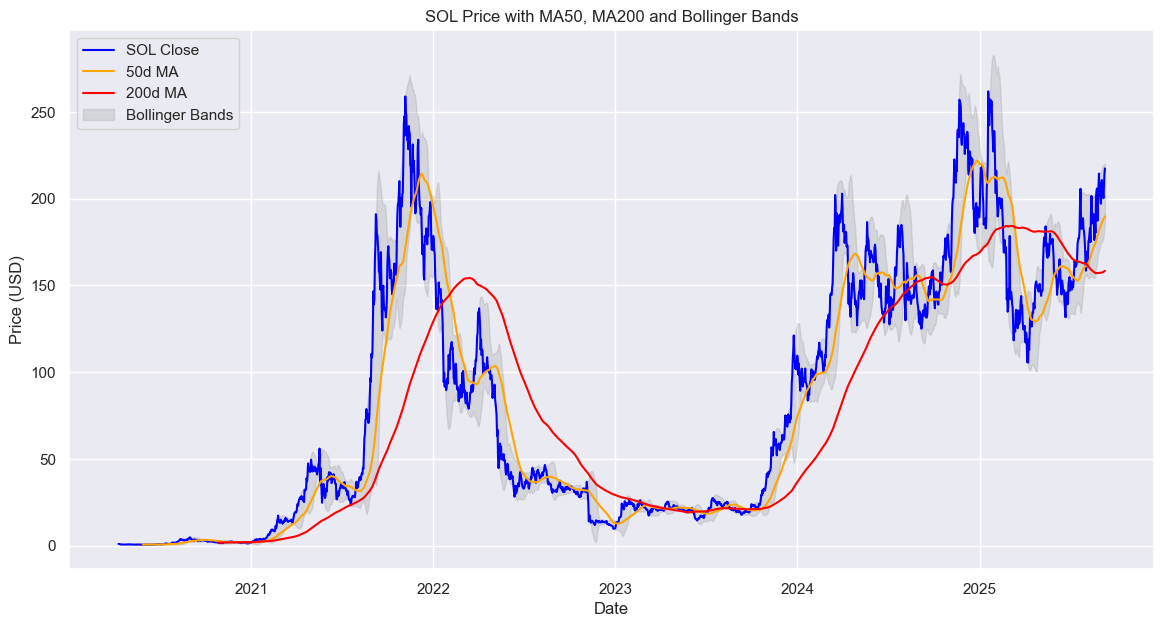

In [34]:
df = yf.download("SOL-USD", period="max", interval="1d", progress=False, auto_adjust=False)

# Moving Averages
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

# Bollinger Bands
df["BB_mid"] = df["Close"].rolling(20).mean()
df["BB_std"] = df["Close"].rolling(20).std()
df["BB_upper"] = df["BB_mid"] + 2*df["BB_std"]
df["BB_lower"] = df["BB_mid"] - 2*df["BB_std"]

# Plot
plt.figure(figsize=(14,7))
plt.plot(df.index, df["Close"], label="SOL Close", color="blue")
plt.plot(df.index, df["MA50"], label="50d MA", color="orange")
plt.plot(df.index, df["MA200"], label="200d MA", color="red")
plt.fill_between(df.index, df["BB_lower"], df["BB_upper"], color="grey", alpha=0.2, label="Bollinger Bands")
plt.title("SOL Price with MA50, MA200 and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

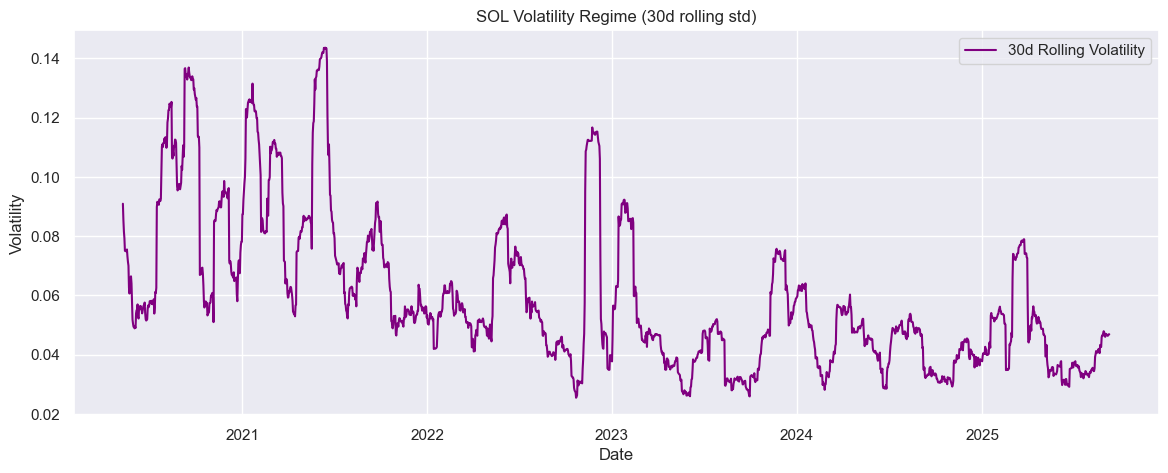

In [35]:
df = yf.download("SOL-USD", period="max", interval="1d", progress=False, auto_adjust=False)

# Daily returns and rolling volatility
returns = df["Close"].pct_change().dropna()
rolling_vol = returns.rolling(30).std()

# Plot
plt.figure(figsize=(14,5))
plt.plot(rolling_vol, color="purple", label="30d Rolling Volatility")
plt.title("SOL Volatility Regime (30d rolling std)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

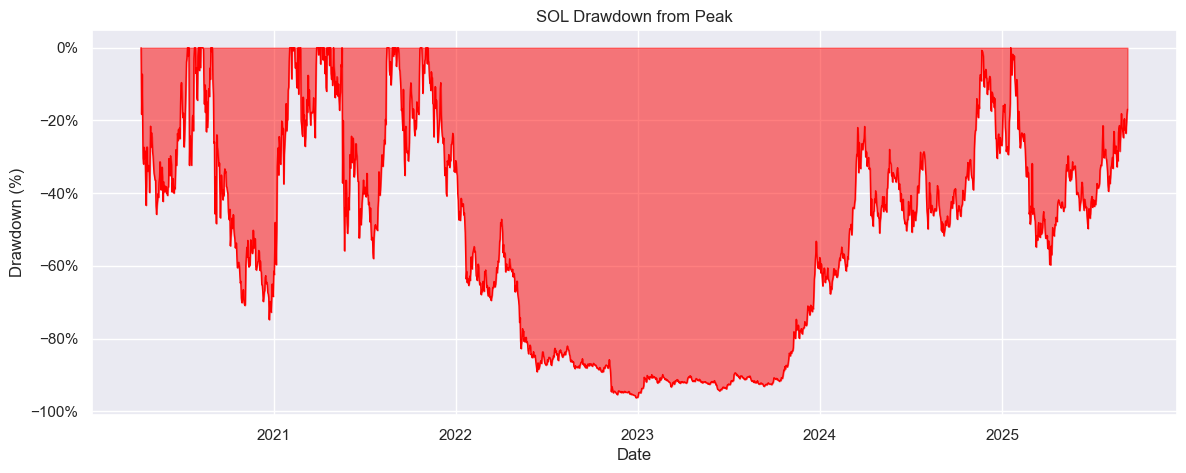

In [47]:
df = yf.download("SOL-USD", period="max", interval="1d", progress=False, auto_adjust=False)

# Drawdown calculation
cum_max = df["Close"].cummax()
drawdown = (df["Close"] - cum_max) / cum_max
y = np.ravel(drawdown.values)

# Plot
plt.figure(figsize=(14,5))
plt.plot(drawdown.index, y, color="red", linewidth=1)
plt.fill_between(drawdown.index, 0, y, color="red", alpha=0.5)
plt.title("SOL Drawdown from Peak")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True)

# Format Y axis as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.show()

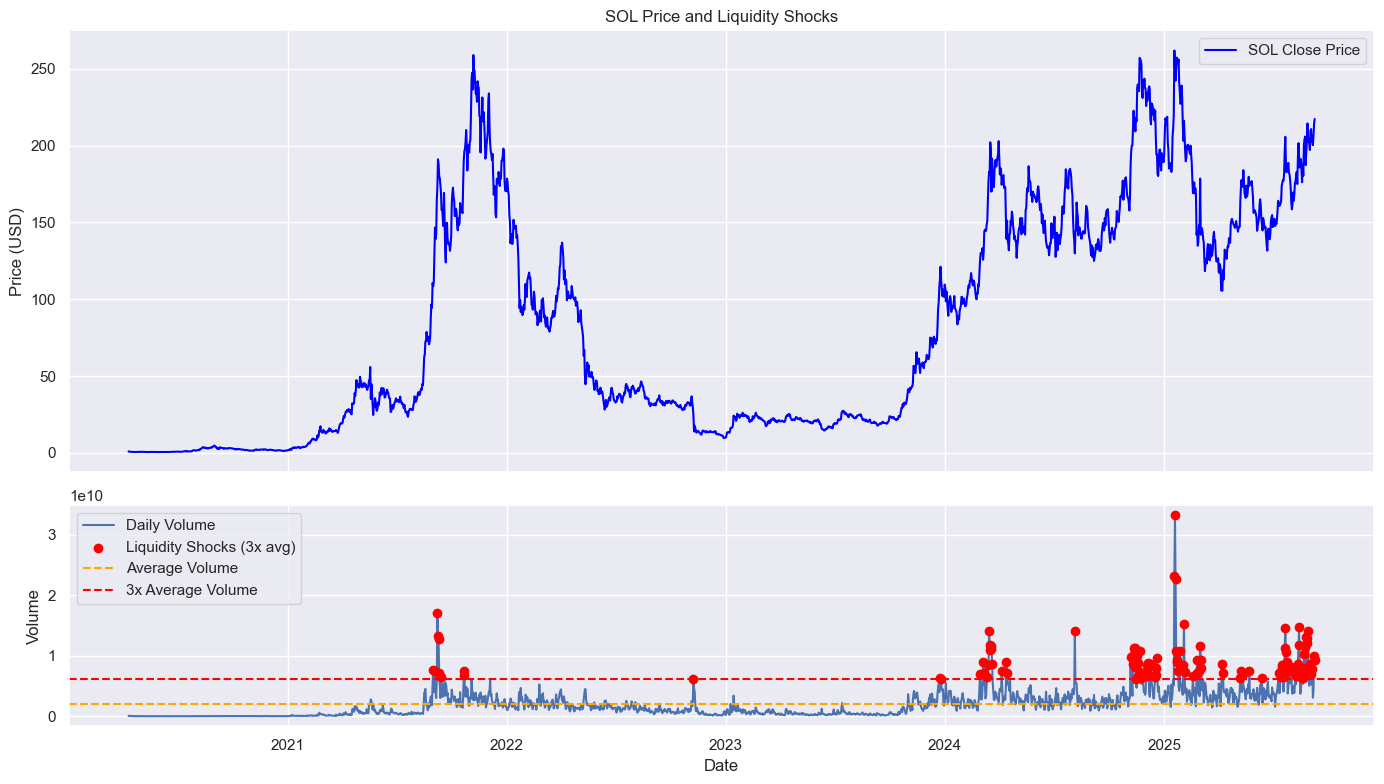

In [38]:

df = yf.download("SOL-USD", period="max", interval="1d", progress=False, auto_adjust=False)


vol = df["Volume"]
avg_vol = vol.mean().item()
threshold = 3 * avg_vol
shocks = vol[vol > threshold]

# Create subplots: top = price, bottom = volume
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8), sharex=True, gridspec_kw={"height_ratios":[2,1]})


ax1.plot(df.index, df["Close"], color="blue", label="SOL Close Price")
ax1.set_title("SOL Price and Liquidity Shocks")
ax1.set_ylabel("Price (USD)")
ax1.grid(True)
ax1.legend()


ax2.plot(vol.index, vol, label="Daily Volume")
ax2.scatter(shocks.index, shocks, color="red", label="Liquidity Shocks (3x avg)", zorder=5)
ax2.axhline(avg_vol, color="orange", linestyle="--", label="Average Volume")
ax2.axhline(threshold, color="red", linestyle="--", label="3x Average Volume")
ax2.set_xlabel("Date")
ax2.set_ylabel("Volume")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

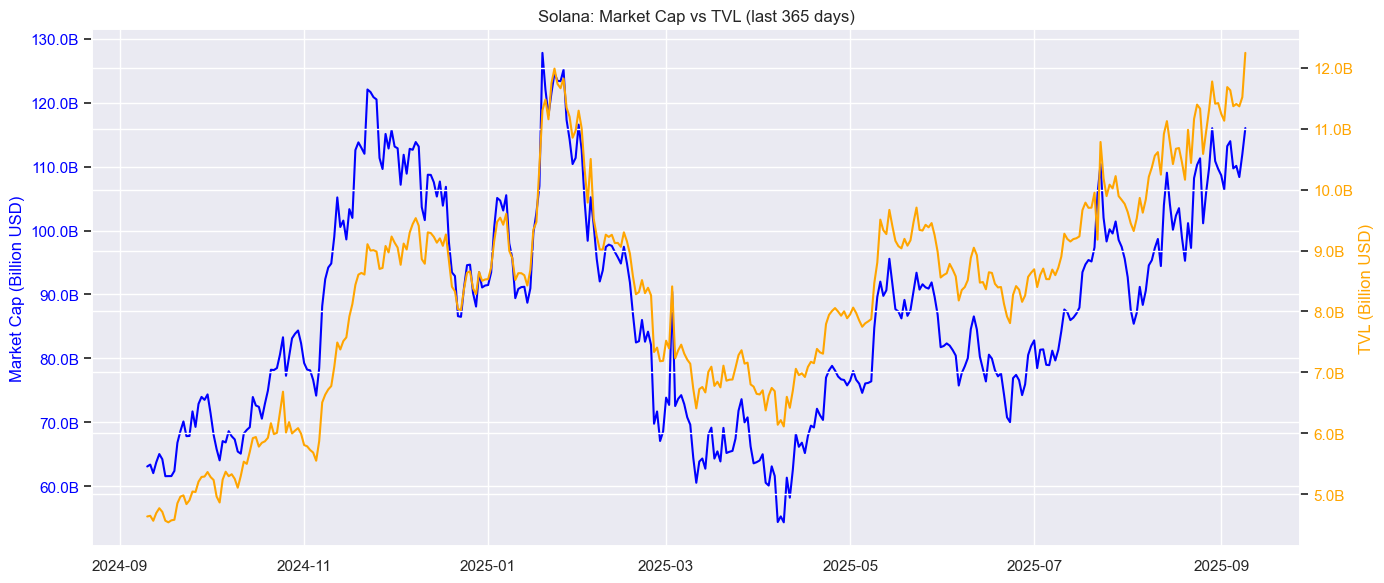

In [69]:
rl_cg = "https://api.coingecko.com/api/v3/coins/solana/market_chart"
params_cg = {"vs_currency": "usd", "days": "365"}
cg = requests.get(url_cg, params=params_cg).json()
mcap = pd.DataFrame(cg["market_caps"], columns=["timestamp", "market_cap"])
mcap["date"] = pd.to_datetime(mcap["timestamp"], unit="ms")
mcap.set_index("date", inplace=True)

# TVL (DefiLlama new API)
url_dl = "https://api.llama.fi/v2/historicalChainTvl/solana"
dl = requests.get(url_dl).json()
tvl = pd.DataFrame(dl)
tvl["date"] = pd.to_datetime(tvl["date"], unit="s")
tvl.set_index("date", inplace=True)

# Join
df = mcap.join(tvl, how="inner")

# Plot
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(df.index, df["market_cap"], color="blue", label="Market Cap")
ax1.set_ylabel("Market Cap (Billion USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

ax2 = ax1.twinx()
ax2.plot(df.index, df["tvl"], color="orange", label="TVL")
ax2.set_ylabel("TVL (Billion USD)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

plt.title("Solana: Market Cap vs TVL (last 365 days)")
fig.tight_layout()
plt.show()

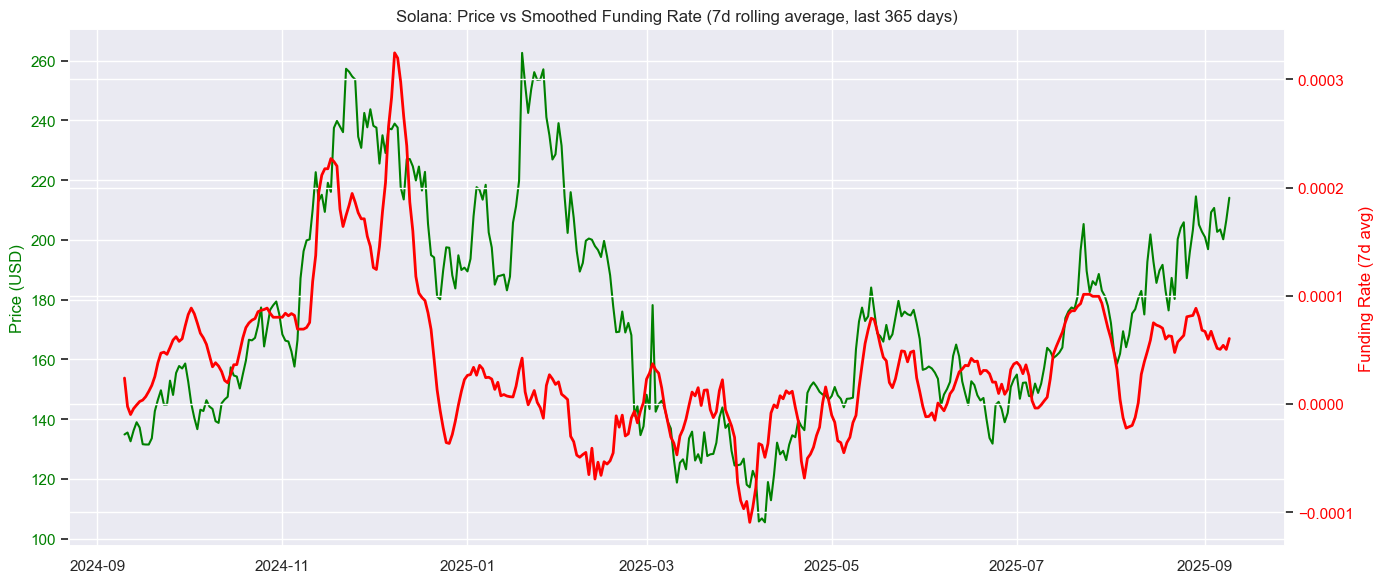

In [76]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# --- Pobranie funding (jak wcześniej, batchowo na rok) ---
symbol = "SOLUSDT"

def get_funding_history(symbol, start_ts, end_ts):
    url = "https://fapi.binance.com/fapi/v1/fundingRate"
    params = {
        "symbol": symbol,
        "limit": 1000,
        "startTime": start_ts,
        "endTime": end_ts
    }
    data = requests.get(url, params=params).json()
    return pd.DataFrame(data)

end = int(time.time() * 1000)
start = end - 365 * 24 * 60 * 60 * 1000

all_batches = []
batch_start = start
while batch_start < end:
    batch_end = batch_start + 1000 * 8 * 60 * 60 * 1000
    df_batch = get_funding_history(symbol, batch_start, min(batch_end, end))
    if df_batch.empty:
        break
    all_batches.append(df_batch)
    batch_start = df_batch["fundingTime"].astype(int).max() + 1
    time.sleep(0.2)

funding = pd.concat(all_batches, ignore_index=True)
funding["date"] = pd.to_datetime(funding["fundingTime"], unit="ms")
funding["rate"] = funding["fundingRate"].astype(float)
funding.set_index("date", inplace=True)

# Wygładzamy funding (7 dni rolling mean)
funding_smoothed = funding["rate"].resample("1h").mean().rolling("7d").mean()

# --- Cena z CoinGecko ---
url_cg = "https://api.coingecko.com/api/v3/coins/solana/market_chart"
params_cg = {"vs_currency": "usd", "days": "365"}
cg = requests.get(url_cg, params=params_cg).json()
prices = pd.DataFrame(cg["prices"], columns=["timestamp", "price"])
prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms")
prices = prices.groupby(prices["date"].dt.floor("h"))["price"].mean().to_frame()

# Join
df = prices.join(funding_smoothed.to_frame("rate"), how="inner")

# --- Wykres ---
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(df.index, df["price"], color="green", label="Price")
ax1.set_ylabel("Price (USD)", color="green")
ax1.tick_params(axis="y", labelcolor="green")

ax2 = ax1.twinx()
ax2.plot(df.index, df["rate"], color="red", linewidth=2, label="Funding Rate (7d avg)")
ax2.set_ylabel("Funding Rate (7d avg)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Solana: Price vs Smoothed Funding Rate (7d rolling average, last 365 days)")
fig.tight_layout()
plt.show()
